In [ ]:
# Age		Personal loan	Total Salary


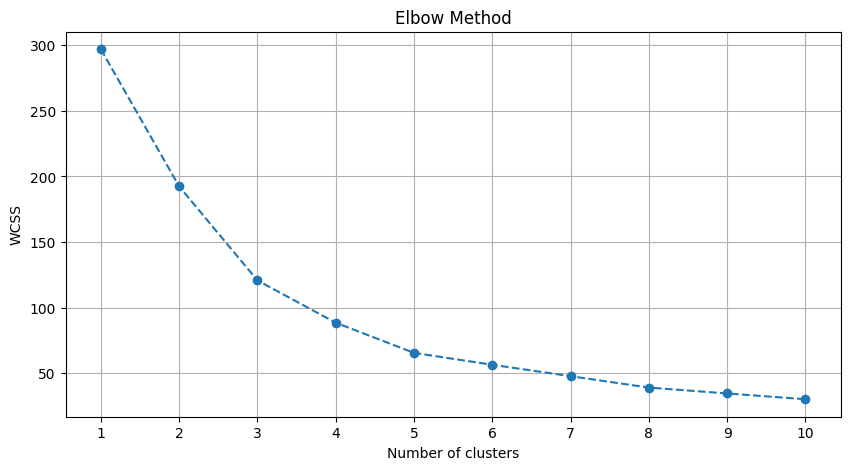

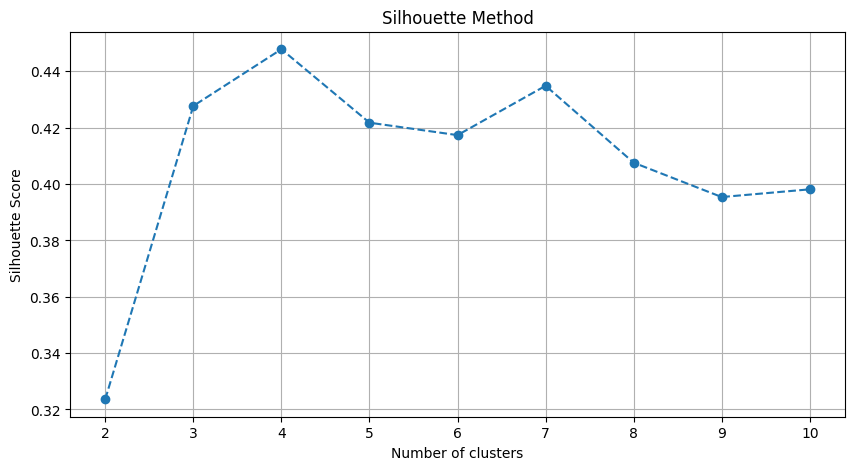

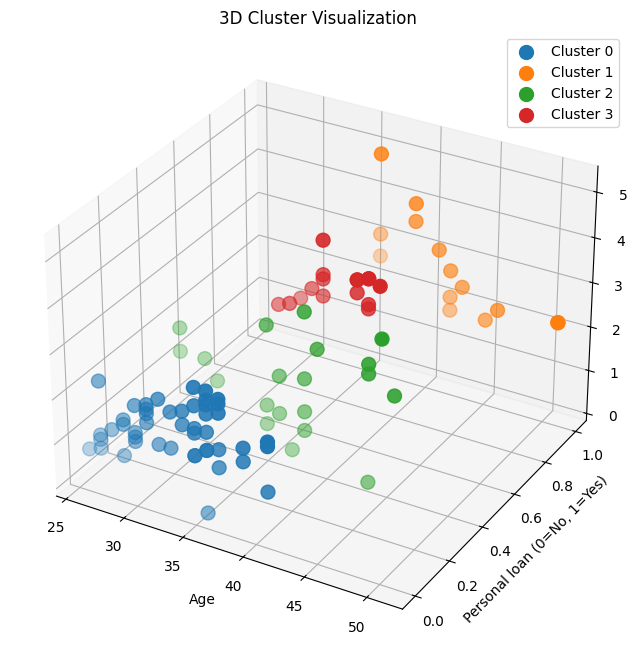

Cluster Centers:
         Age  Personal loan  Total Salary
0  33.510638  -3.885781e-16  1.831915e+06
1  42.071429   1.000000e+00  2.757143e+06
2  43.000000   0.000000e+00  3.640000e+06
3  31.722222   1.000000e+00  1.516667e+06


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv('age_salary.csv')
df.head()
# Select only the required columns
df = df[['Age', 'Personal loan', 'Total Salary']]

# Convert 'Personal loan' to numerical values (Yes=1, No=0)
le = LabelEncoder()
df['Personal loan'] = le.fit_transform(df['Personal loan'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Elbow Method to find optimal number of clusters
wcss = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid()
plt.show()

# Silhouette Method to find optimal number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

# Based on the plots, choose optimal number of clusters  
optimal_clusters = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

# 3D Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['Age'], 
               cluster_data['Personal loan'], 
               cluster_data['Total Salary'], 
               label=f'Cluster {cluster}',
               s=100)

ax.set_title('3D Cluster Visualization')
ax.set_xlabel('Age')
ax.set_ylabel('Personal loan (0=No, 1=Yes)')
ax.set_zlabel('Total Salary')
ax.legend()
plt.show()

# Print cluster centers in original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers, columns=['Age', 'Personal loan', 'Total Salary'])
print("Cluster Centers:")
print(centers_df)

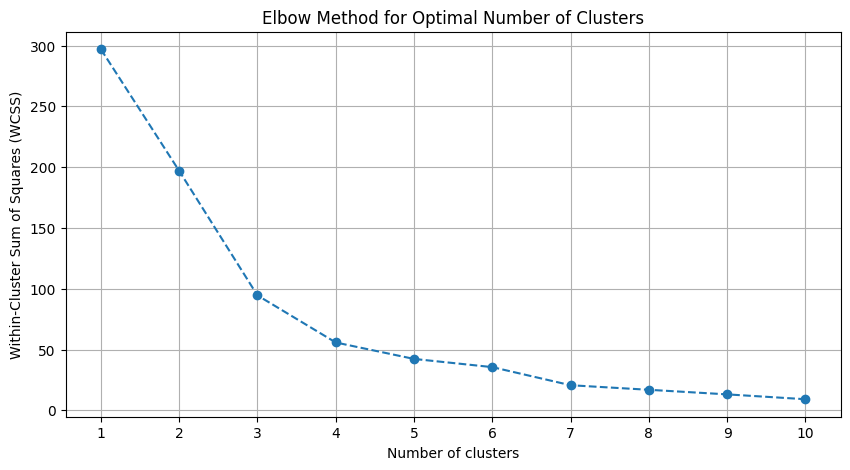

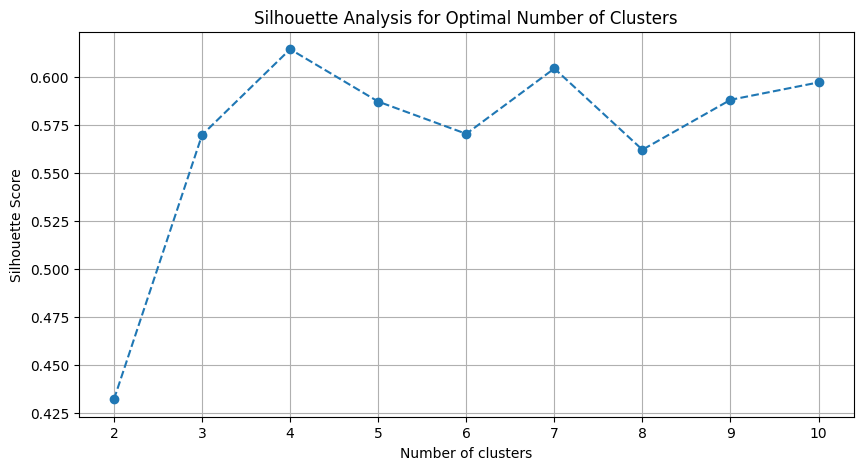

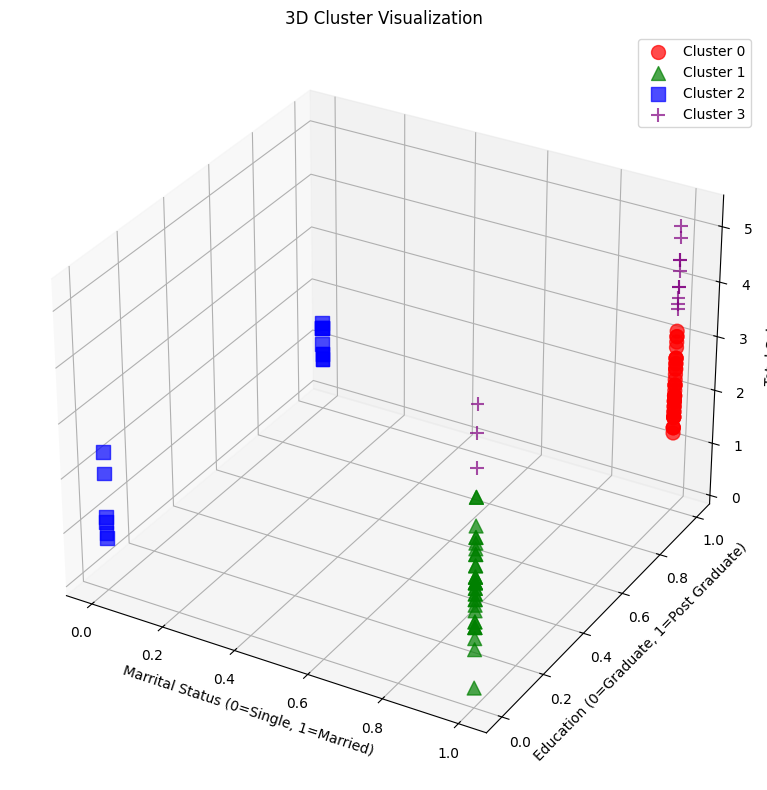


Cluster Centers (Original Scale):
   Marrital Status  Education  Total Salary
0              1.0   1.000000  2.151351e+06
1              1.0   0.000000  2.064706e+06
2              0.0   0.600000  1.240000e+06
3              1.0   0.769231  4.338462e+06

Cluster Interpretation:

Cluster 0:
- Marrital Status: Married
- Education: Post Graduate
- Average Salary: 2,151,351.35

Cluster 1:
- Marrital Status: Married
- Education: Graduate
- Average Salary: 2,064,705.88

Cluster 2:
- Marrital Status: Single
- Education: Post Graduate
- Average Salary: 1,240,000.00

Cluster 3:
- Marrital Status: Married
- Education: Post Graduate
- Average Salary: 4,338,461.54


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv('age_salary.csv')

# Select only the required columns
df = df[['Marrital Status', 'Education', 'Total Salary']]

# Convert categorical columns to numerical values
df['Marrital Status'] = df['Marrital Status'].map({'Single': 0, 'Married': 1})
df['Education'] = df['Education'].map({'Graduate': 0, 'Post Graduate': 1})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Elbow Method to find optimal number of clusters
wcss = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(cluster_range)
plt.grid()
plt.show()

# Silhouette Method to find optimal number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

# Based on the plots, choose optimal number of clusters (let's assume 3)
optimal_clusters = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

# 3D Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors and markers for each cluster
colors = ['r', 'g', 'b','purple']
markers = ['o', '^', 's','+']

# Plot each cluster
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['Marrital Status'], 
               cluster_data['Education'], 
               cluster_data['Total Salary'], 
               c=colors[cluster],
               marker=markers[cluster],
               label=f'Cluster {cluster}',
               s=100,
               alpha=0.7)

ax.set_title('3D Cluster Visualization')
ax.set_xlabel('Marrital Status (0=Single, 1=Married)')
ax.set_ylabel('Education (0=Graduate, 1=Post Graduate)')
ax.set_zlabel('Total Salary')
ax.legend()
plt.tight_layout()
plt.show()

# Print cluster centers in original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers, columns=['Marrital Status', 'Education', 'Total Salary'])
print("\nCluster Centers (Original Scale):")
print(centers_df)

# Print cluster interpretation
print("\nCluster Interpretation:")
for i in range(optimal_clusters):
    print(f"\nCluster {i}:")
    print(f"- Marrital Status: {'Married' if centers_df.iloc[i,0] > 0.5 else 'Single'}")
    print(f"- Education: {'Post Graduate' if centers_df.iloc[i,1] > 0.5 else 'Graduate'}")
    print(f"- Average Salary: {centers_df.iloc[i,2]:,.2f}")

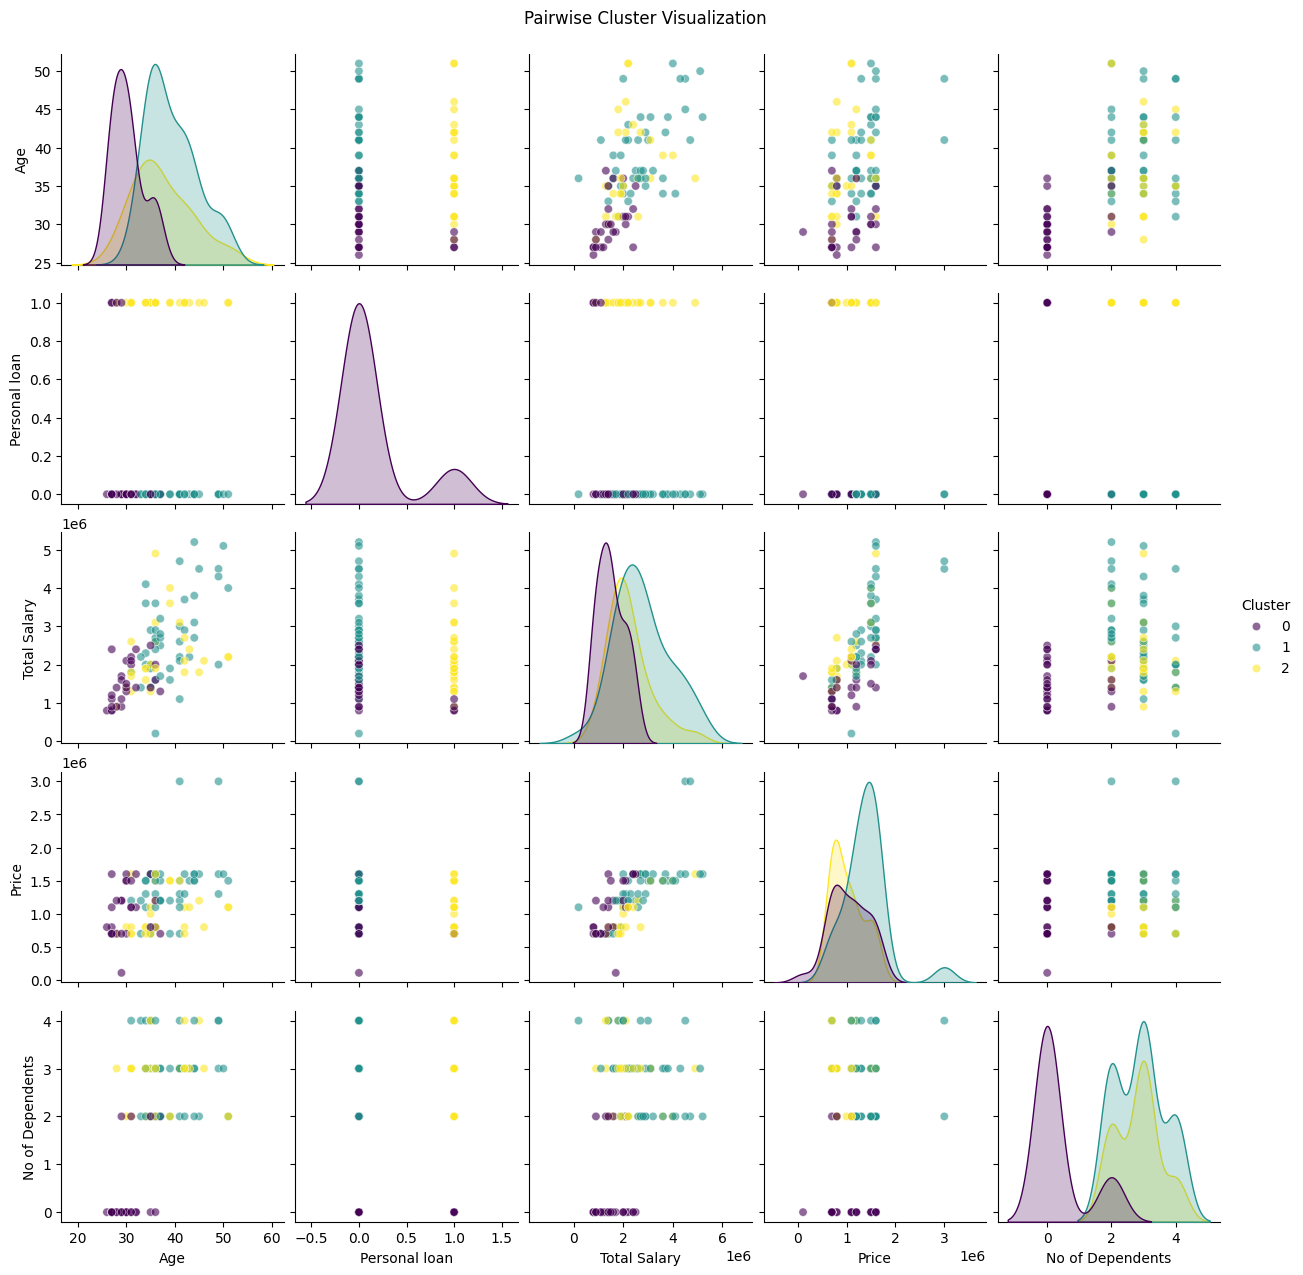

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data (using all columns from your example)
df = pd.read_csv('age_salary.csv')

# Preprocessing
df['Personal loan'] = df['Personal loan'].map({'Yes': 1, 'No': 0})
df['Marrital Status'] = df['Marrital Status'].map({'Single': 0, 'Married': 1})
df['Profession'] = df['Profession'].map({'Salaried': 0, 'Business': 1})
df['Education'] = df['Education'].map({'Graduate': 0, 'Post Graduate': 1})

# Select all numerical columns (or specific ones you want)
num_cols = ['Age', 'Personal loan', 'Total Salary', 'Price', 'No of Dependents']
X = df[num_cols]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Pairplot visualization
sns.pairplot(df, vars=num_cols, hue='Cluster', palette='viridis', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Cluster Visualization', y=1.02)
plt.show()

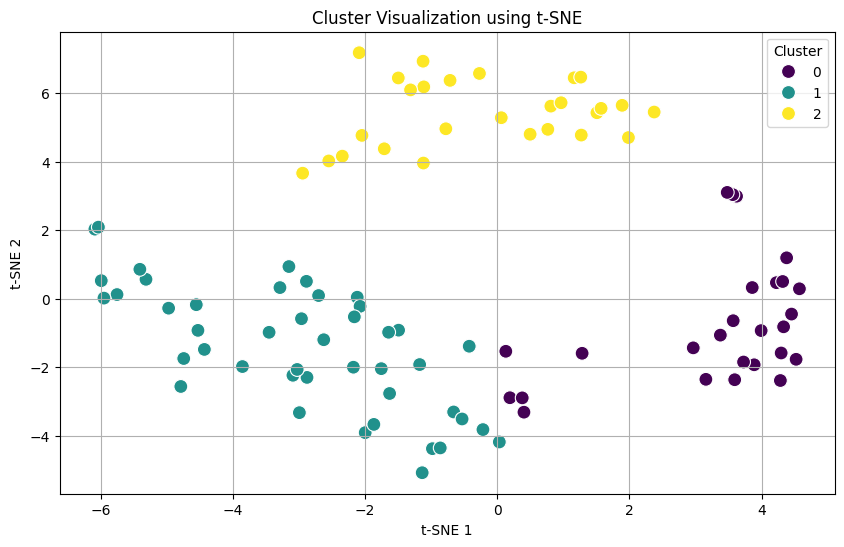

In [5]:
from sklearn.manifold import TSNE
# or: from umap import UMAP

# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('Cluster Visualization using t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()